# Практика №2

In [1]:
import iapws
from iapws import IAPWS97 as gas

Упростим себе жизнь

In [2]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

### Немного про numpy

In [3]:
import numpy as np

In [4]:
vector_a = np.array([1, 2, 3, 4, 5, 6])
vector_a

array([1, 2, 3, 4, 5, 6])

In [5]:
vector_a.T

array([1, 2, 3, 4, 5, 6])

In [6]:
vector_a.shape

(6,)

In [7]:
some_list = [1, 2, 3, 4, 5, 6]
vector_b = np.array(some_list)
vector_b

array([1, 2, 3, 4, 5, 6])

In [8]:
vector_b * np.pi

array([ 3.14159265,  6.28318531,  9.42477796, 12.56637061, 15.70796327,
       18.84955592])

In [9]:
vector_b[3:], vector_b[:-2], vector_b[::-1]

(array([4, 5, 6]), array([1, 2, 3, 4]), array([6, 5, 4, 3, 2, 1]))

In [10]:
vector_b.reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [11]:
vector_b.reshape(2, -1), vector_b.reshape(2, 3)

(array([[1, 2, 3],
        [4, 5, 6]]),
 array([[1, 2, 3],
        [4, 5, 6]]))

In [12]:
vector_b.reshape(2, -1).T.dot(vector_b.reshape(2,-1))

array([[17, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])

In [13]:
vector_a.reshape(-1,1).dot(vector_b.reshape(1, -1))

array([[ 1,  2,  3,  4,  5,  6],
       [ 2,  4,  6,  8, 10, 12],
       [ 3,  6,  9, 12, 15, 18],
       [ 4,  8, 12, 16, 20, 24],
       [ 5, 10, 15, 20, 25, 30],
       [ 6, 12, 18, 24, 30, 36]])

In [14]:
list(map(lambda x, y: np.sin(x) ** y, some_list, some_list))

[0.8414709848078965,
 0.826821810431806,
 0.0028103847344612735,
 0.3280425818638836,
 -0.8108146060946713,
 0.0004758860206876551]

In [15]:
np.sin(vector_a) ** vector_a

array([ 8.41470985e-01,  8.26821810e-01,  2.81038473e-03,  3.28042582e-01,
       -8.10814606e-01,  4.75886021e-04])

## Задача 1.5

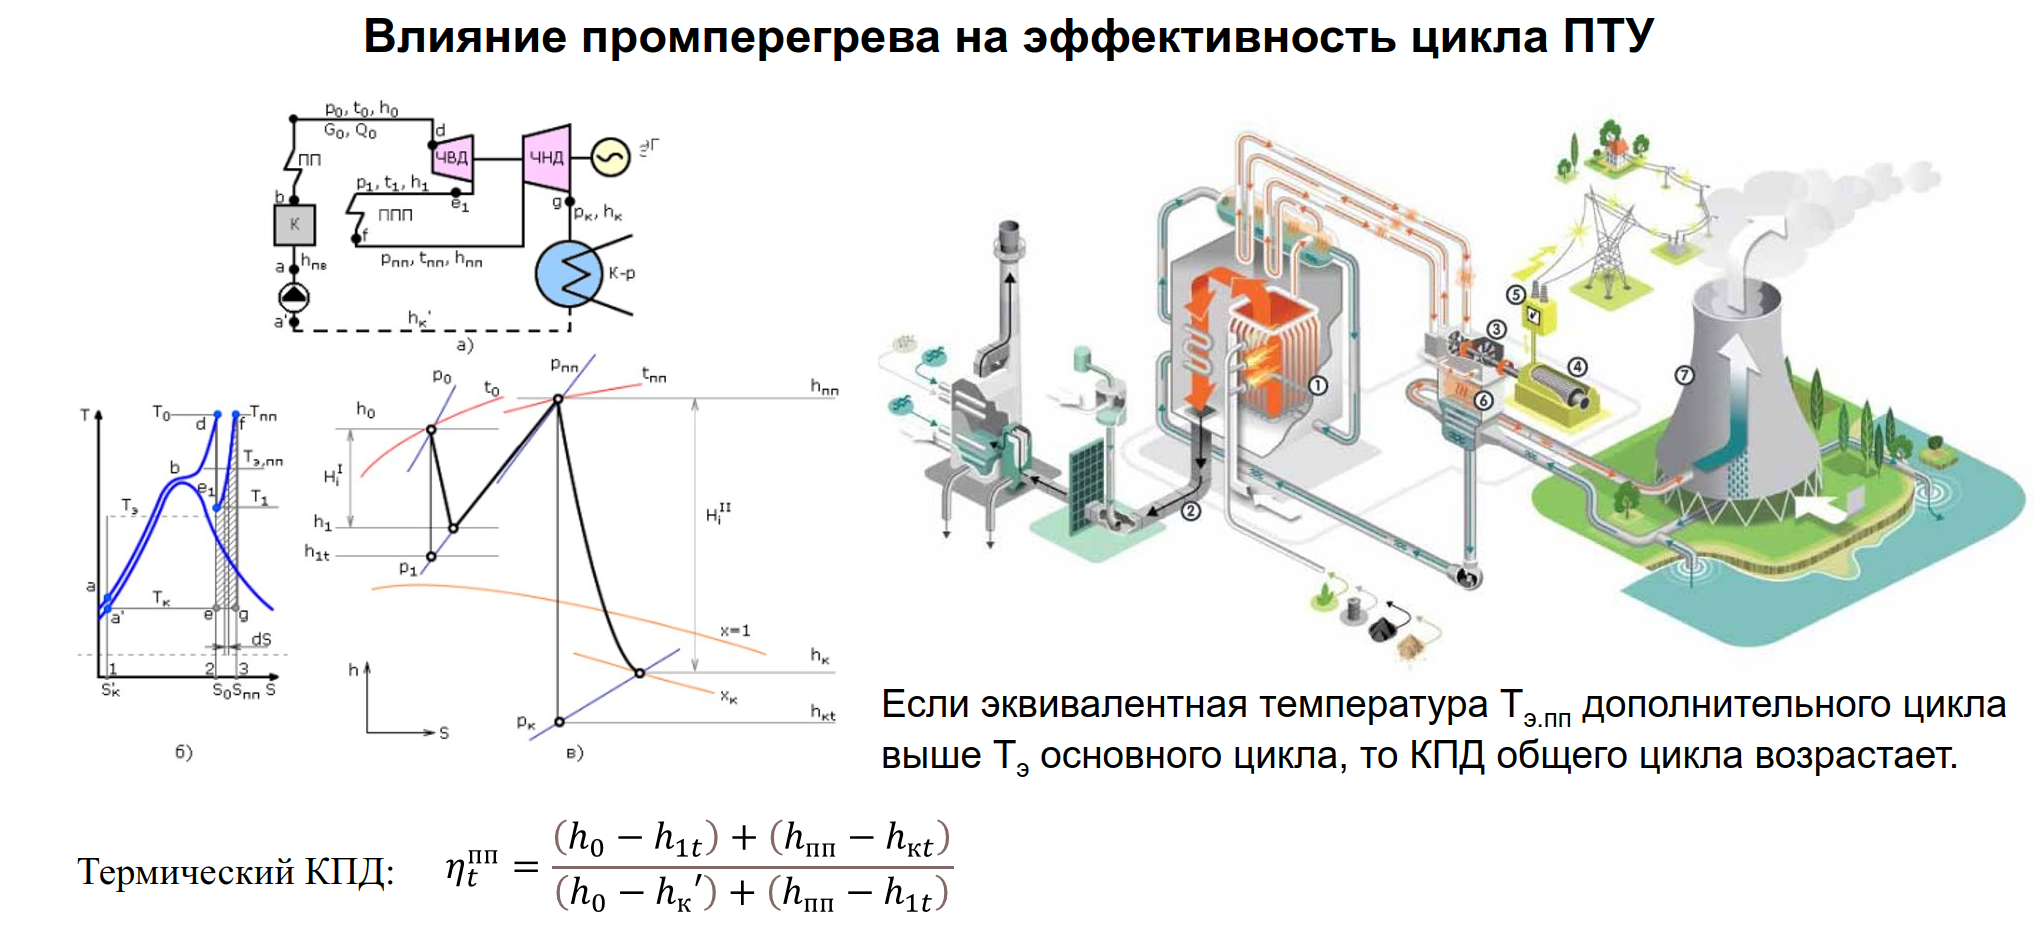

Оценить влияние промежуточного перегрева водяного пара на КПД ПТУ:

$Р_0$=13 МПа, $t_0$=520 °С, $Р_к$=5 кПа. Параметры промперегрева: $Р_{п.п.}$=2.5 МПа; $t_{п.п.}$=520 °С.

In [16]:
p_0 = 13 * MPa
t_0 = to_kelvin(520)
p_k = 5 * kPa
p_middle = 2.5 * MPa
t_middle = to_kelvin(520)

In [17]:
point_0_start = gas(P=p_0 * unit, T=t_0)

point_0_end = gas(P=p_middle * unit, s=point_0_start.s)

point_1_start = gas(P=p_middle * unit, T=t_middle)

point_condenser = gas(P=p_k * unit, s=point_1_start.s)

point_pump = gas(P=p_k * unit, x=0)

In [18]:
useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)

efficiency = useful_energy / full_energy
efficiency

0.4478129711672064

In [19]:
print("Ответ на задачу 1.5:", round(efficiency * 100, 3), "%")

Ответ на задачу 1.5: 44.781 %


## Задача 1.5 (a)

Оценить влияние гидравлических потерь $ΔР_{п.п.}$ = 0.1 Рпп в тракте промежуточного перегрева водяного пара на термическое КПЛ ПТУ для условий примера `1.5`: $Р_0$=13 МПа, $t_0$=520 °С, $Р_к$=5 кПа. Параметры промперегрева: $Р_{п.п.}$=2.5 МПа; $t_{п.п.}$=520 °С. Оценить изменение термического КПД относительно `1.5`

In [20]:
p_0 = 13 * MPa
t_0 = to_kelvin(520)
p_k = 5 * kPa
p_middle = 2.5 * MPa
t_middle = to_kelvin(520)
p_0_end = p_middle + 0.1 * p_middle

In [21]:
point_0_start = gas(P=p_0 * unit, T=t_0)

point_0_end = gas(P=p_0_end * unit, s=point_0_start.s)

point_1_start = gas(P=p_middle * unit, T=t_middle)

point_condenser = gas(P=p_k * unit, s=point_1_start.s)

point_pump = gas(P=p_k * unit, x=0)

In [22]:
efficiency_old = efficiency

useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)

efficiency = useful_energy / full_energy
efficiency

0.44460024913137625

In [23]:
difference_in_percent = (efficiency - efficiency_old) / efficiency_old
print("Ответ на задачу 1.5 (a):", round(difference_in_percent * 100, 3), "%")

Ответ на задачу 1.5 (a): -0.717 %


## Задача 1.6

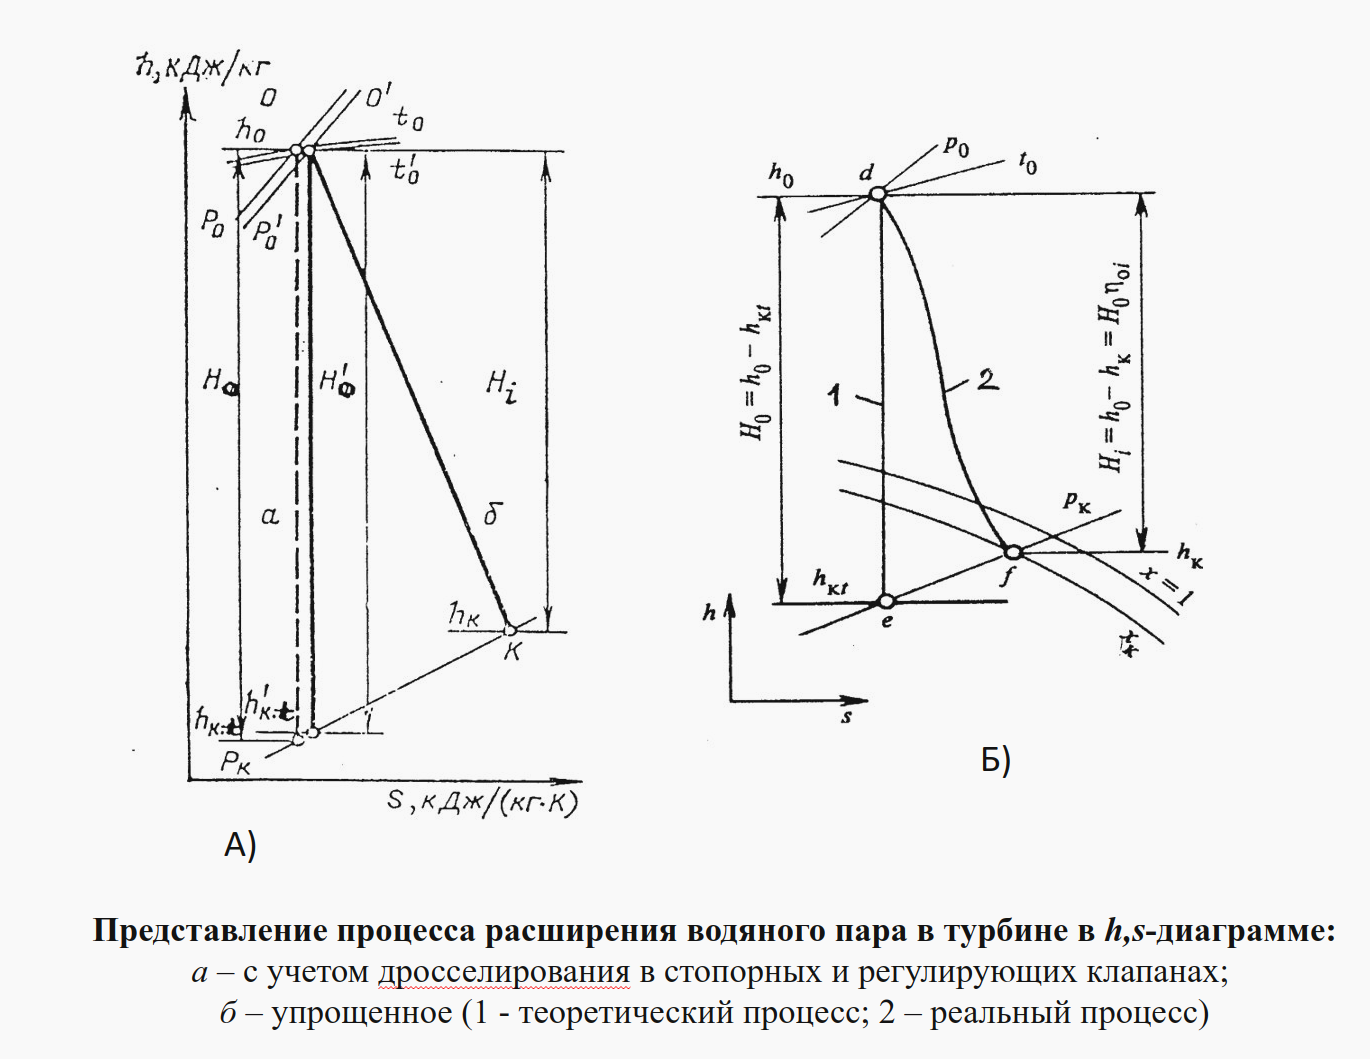

Оценить относительный внутренний КПД $\eta_{oi}$ части высокого давления ЧВД турбины с промперегревом при $Р_0$=13 МПа; $t_0$=520 °С и давлении $Р_1$=2,75 МПа. Известен удельный объем пара $v_1$ = 0,09422 $м^3/кг$.

In [24]:
p_0 = 13 * MPa
t_0 = to_kelvin(540)

p_1 = 2.75 * MPa
v_1 = 0.09422

In [25]:
point_0 = gas(P=p_0 * unit, T=t_0)
point_1 = gas(P=p_1 * unit, s=point_0_start.s)
point_1_real = gas(P=p_1 * unit, v=v_1)

In [26]:
theoretical_heat_drop = point_0.h - point_1.h

In [27]:
try:
    real_heat_drop = point_0.h - point_1_real.h
except AttributeError as error:
    print(error)

'IAPWS97' object has no attribute 'h'


Тут мы грустим, поскольку библиотека не может в вычисление параметров по давлению и объему =(

In [28]:
from scipy.optimize import minimize

def error(t):
    v = gas(P=p_1 * unit, T=float(to_kelvin(t))).v
    return (v-v_1) ** 2

t = float(minimize(error, 600, tol=1e-8).x)

In [29]:
point_1_real = gas(P=p_1 * unit, T=to_kelvin(t))

point_1_real.v, v_1, (point_1_real.v - v_1)**2

(0.0942193669927501, 0.09422, 4.006981784196466e-13)

In [30]:
real_heat_drop = point_0.h - point_1_real.h
turbine_efficiency = real_heat_drop / theoretical_heat_drop
print("Ответ на задачу 1.6:", round(turbine_efficiency * 100, 3), "%")

Ответ на задачу 1.6: 78.512 %


## Задача 1.9

При удельном расходе водяного пара $d_0$= 3,0 кг/(кВт·ч) оценить расходы водяного пара для энергоблоков мощностью $N_{э1}$ = 300 МВт и $N_{э2}$ = 800 МВт.

$$ G_0 = \frac{d_{0} N_{э}}{3600} $$

In [31]:
d_0 = 3
N_1 = 300 * 10**6
N_2 = 800 * 10 ** 6 

mass_flow_first = d_0 * N_1 / 3600
mass_flow_second = d_0 * N_2 / 3600

print(
    "Ответ на задачу 1.9:\n",
    round(mass_flow_first, 3), "Кг/c Для первой турбины\n",
    round(mass_flow_second, 3), "Кг/c Для второй турбины"
)

Ответ на задачу 1.9:
 250000.0 Кг/c Для первой турбины
 666666.667 Кг/c Для второй турбины


# Задача

Написать функцию отрисовки h-s диаграммы процессов расширения в турбине

In [32]:
# Просто вспомогательный код который нужен для отрисовки. Берется откуда-то еще в курсовом проекте

from typing import List, Tuple, Optional
from iapws import IAPWS97
import matplotlib.pyplot as plt
import numpy as np

MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

p_0 = 25 * MPa #Начальное давление
t_0 = 560 #Начальная температура
p_middle = 3.62 * MPa #Давление промперегрева
t_middle = 565 #Температура промперегрева
p_k = 3.5 * kPa #Давление в конденсаторе
t_feed_water = 269
p_feed_water = 1.35 * p_0

internal_efficiency = 0.85
mechanical_efficiency = 0.994
generator_efficiency = 0.99

delta_p0 = 0.05 * p_0
delta_p_middle = 0.1 * p_middle
delta_p_1 = 0.03 * p_middle


real_p0 = p_0 - delta_p0
real_p1t = p_middle + delta_p_middle
real_p_middle = p_middle - delta_p_1

_point_0 = gas(P = p_0 * unit, T=to_kelvin(t_0))
point_0 = gas(P=real_p0 * unit, h=_point_0.h)
point_1t = gas(P=real_p1t * unit, s=_point_0.s)

hp_heat_drop = (_point_0.h - point_1t.h) * internal_efficiency
h_1 = point_0.h - hp_heat_drop
point_1 = gas(P=real_p1t * unit, h=h_1)

_point_middle = gas(P=p_middle * unit, T=to_kelvin(t_middle))
point_middle = gas(P=real_p_middle * unit, h=_point_middle.h)
point_2t = gas(P=p_k * unit, s=_point_middle.s)

lp_heat_drop = (_point_middle.h - point_2t.h) * internal_efficiency
h_2 = point_middle.h - lp_heat_drop
point_2 = gas(P=p_k * unit, h=h_2)

In [33]:
def legend_without_duplicate_labels(ax: plt.Axes) -> None:
    """
    Убирает дубликаты из легенды графика
    :param plt.Axes ax: AxesSubplot с отрисованными графиками
    :return None:
    """
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

    
def plot_process(ax: plt.Axes, points: List[IAPWS97], **kwargs) -> None:
    """
    Отрисовка процесса расширения по точкам
    :param plt.Axes ax: AxesSubplot с отрисованными графиками
    :param List[IAPWS97] points: Список инициализиованных точек процесса
    :param kwargs:
    :return None:
    """
    ax.plot([point.s for point in points], [point.h for point in points], **kwargs)

    
def get_isobar(point: IAPWS97) -> Tuple[List[float], List[float]]:
    """
    Собрать координаты изобары в hs осях
    :param IAPWS97 point: Точка для изобары
    :return Tuple[List[float], List[float]]:
    """
    s = point.s
    s_values = np.arange(s * 0.9, s * 1.1, 0.2 * s / 1000)
    h_values = [gas(P=point.P, s=_s).h for _s in s_values]
    return s_values, h_values


def _get_isoterm_steam(point: IAPWS97) -> Tuple[List[float], List[float]]:
    """
    Собрать координаты изотермы для пара в hs осях
    :param IAPWS97 point: Точка для изотермы
    :return Tuple[List[float], List[float]]:
    """
    t = point.T
    p = point.P
    s = point.s
    s_max = s * 1.2
    s_min = s * 0.8
    p_values = np.arange(p * 0.8, p * 1.2, 0.4 * p / 1000)
    h_values = np.array([gas(P=_p, T=t).h for _p in p_values])
    s_values = np.array([gas(P=_p, T=t).s for _p in p_values])
    mask = (s_values >= s_min) & (s_values <= s_max)
    return s_values[mask], h_values[mask]


def _get_isoterm_two_phases(point: IAPWS97) -> Tuple[List[float], List[float]]:
    """
    Собрать координаты изотермы для влажного пара в hs осях
    :param IAPWS97 point: Точка для изотермы
    :return Tuple[List[float], List[float]]:
    """
    x = point.x
    p = point.P
    x_values = np.arange(x * 0.9, min(x * 1.1, 1), (1 - x) / 1000)
    h_values = np.array([gas(P=p, x=_x).h for _x in x_values])
    s_values = np.array([gas(P=p, x=_x).s for _x in x_values])
    return s_values, h_values


def get_isoterm(point) -> Tuple[List[float], List[float]]:
    """
    Собрать координаты изотермы в hs осях
    :param IAPWS97 point: Точка для изотермы
    :return Tuple[List[float], List[float]]:
    """
    if point.phase == 'Two phases':
        return _get_isoterm_two_phases(point)
    return _get_isoterm_steam(point)


def plot_isolines(ax: plt.Axes, point: IAPWS97) -> None:
    """
    Отрисовка изобары и изотермы
    :param plt.Axes ax: AxesSubplot на котором изобразить линии
    :param IAPWS97 point: Точка для изображения изолиний
    :return None:
    """
    s_isobar, h_isobar = get_isobar(point)
    s_isoterm, h_isoterm = get_isoterm(point)
    ax.plot(s_isobar, h_isobar, color='green', label='Изобара')
    ax.plot(s_isoterm, h_isoterm, color='blue', label='Изотерма')

    
def plot_points(ax: plt.Axes, points: List[IAPWS97]) -> None:
    """
    Отрисовать точки на hs-диаграмме
    :param plt.Axes ax: AxesSubplot на котором изобразить точки
    :param List[IAPWS97] points: Точки для отображения
    return None
    """
    for point in points:
        ax.scatter(point.s, point.h, s=50, color="red")
        plot_isolines(ax, point)
        
def get_humidity_constant_line(
    point: IAPWS97,
    max_p: float,
    min_p: float,
    x: Optional[float]=None
) -> Tuple[List[float], List[float]]:
    """
    Собрать координаты линии с постоянной степенью сухости в hs осях
    :param IAPWS97 point: Точка для изолинии
    :param float max_p: Максимальное давление для линии
    :param float min_p: Минимальное давление для линии
    :param Optional[float] x: Степень сухости для отрисовки
    :return Tuple[List[float], List[float]]:
    """
    _x = x if x else point.x
    p_values = np.arange(min_p, max_p, (max_p - min_p) / 1000)
    h_values = np.array([gas(P=_p, x=_x).h for _p in p_values])
    s_values = np.array([gas(P=_p, x=_x).s for _p in p_values])
    return s_values, h_values

def plot_humidity_lines(ax: plt.Axes, points: List[IAPWS97]) -> None:
    """
    Отрисовать изолинии для степеней сухости на hs-диаграмме
    :param plt.Axes ax: AxesSubplot на котором изобразить изолинии
    :param List[IAPWS97] points: Точки для отображения
    return None
    """
    pressures = [point.P for point in points]
    min_pressure = min(pressures) if min(pressures) > 700/1e6 else 700/1e6
    max_pressure = max(pressures) if max(pressures) < 22 else 22
    for point in points:
        if point.phase == 'Two phases':
            s_values, h_values = get_humidity_constant_line(point, max_pressure, min_pressure, x=1)
            ax.plot(s_values, h_values, color="gray")
            s_values, h_values = get_humidity_constant_line(point, max_pressure, min_pressure)
            ax.plot(s_values, h_values, color="gray", label='Линия сухости')
            ax.text(s_values[10], h_values[10], f'x={round(point.x, 2)}')

def plot_hs_diagram(ax: plt.Axes, points: List[IAPWS97]) -> None:
    """
    Построить изобары и изотермы для переданных точек. Если степень сухости у точки не равна 1, то построется
    дополнительно линия соответствующей степени сухости
    :param plt.Axes ax: AxesSubplot на котором изобразить изолинии
    :param List[IAPWS97] points: Точки для отображения
    return None
    """
    plot_points(ax, points)
    plot_humidity_lines(ax, points)
    ax.set_xlabel(r"S, $\frac{кДж}{кг * K}$", fontsize=14)
    ax.set_ylabel(r"h, $\frac{кДж}{кг}$", fontsize=14)
    ax.set_title("HS-диаграмма процесса расширения", fontsize=18)
    ax.legend()
    ax.grid()
    legend_without_duplicate_labels(ax)

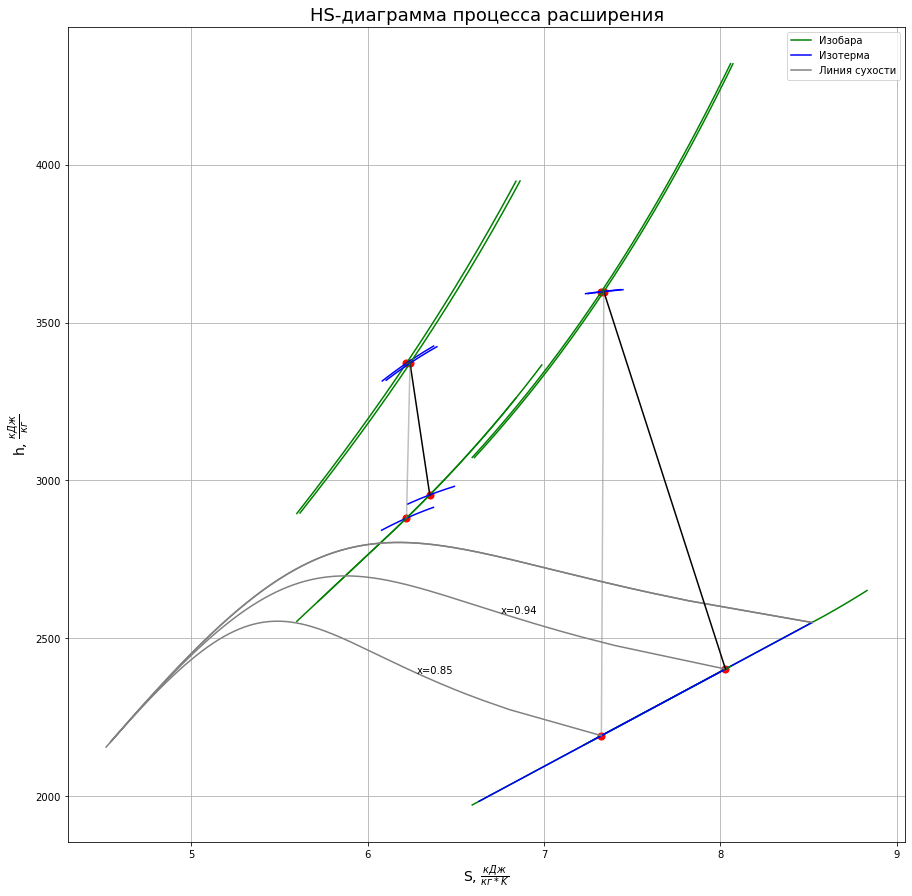

In [34]:
fig, ax  = plt.subplots(1, 1, figsize=(15, 15))
plot_hs_diagram(
    ax,
    points=[_point_0, point_0, point_1t, point_1, _point_middle, point_middle, point_2, point_2t]
)
plot_process(ax, points=[_point_0, point_0, point_1], color='black')
plot_process(ax, points=[_point_middle, point_middle, point_2], color='black')
plot_process(ax, points=[_point_0, point_0, point_1t], alpha=0.5, color='grey')
plot_process(ax, points=[_point_middle, point_middle, point_2t], alpha=0.5, color='grey')